NiN model avoid fully connected layers implementing 1x1 conv both in every block and as last layer with a number of out featurs equal to the out classes and the apply a global (adaptive) avg pool meaning we choose the hxw dim and the alg decides the stride and padding to obtain them then applies avg.

In [1]:
!rm -r /content/Learning
!git clone https://github.com/valeman100/Learning.git
import sys
sys.path.append('/content/Learning/Fundamentals_For_Learning_Folder/') 
import Fundamentals_For_Learning as FFL
from torch import nn
import torch

rm: cannot remove '/content/Learning': No such file or directory
Cloning into 'Learning'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 62 (delta 17), reused 54 (delta 15), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [2]:
train_dl, val_dl, test_dl = FFL.data_preparation(batch=128, resize=(224,224))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw

60000 10000 375 94 79


In [3]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())
    
class NiN(FFL.LeNet):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(p=0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten())

In [4]:
model, loss_f = FFL.get_model(NiN(), (1,1,224,224))

AttributeError: ignored

In [5]:
train_loss, val_loss, acc = FFL.fit(train_dl, val_dl, test_dl, loss_f, model, lr=0.05, epochs=10)

Epoch: 0, loss = 2.302715450922648, v_loss = 2.301201343536377, accuracy = 0.22142009437084198
Epoch: 1, loss = 2.2346757357915243, v_loss = 2.013628350927475, accuracy = 0.2704707384109497
Epoch: 2, loss = 1.6441821033159891, v_loss = 1.1740779432844608, accuracy = 0.5800039768218994
Epoch: 3, loss = 0.8312418988545736, v_loss = 0.5854872344656193, accuracy = 0.7784810066223145
Epoch: 4, loss = 0.7569747423330943, v_loss = 0.5650419599198281, accuracy = 0.7821400165557861
Epoch: 5, loss = 0.5474336415926615, v_loss = 0.4822050247420656, accuracy = 0.8098298907279968
Epoch: 6, loss = 0.48288460636138913, v_loss = 0.4507352830247676, accuracy = 0.8221914768218994
Epoch: 7, loss = 0.5001690812905629, v_loss = 0.4016558291747215, accuracy = 0.840585470199585
Epoch: 8, loss = 0.4146129518349965, v_loss = 0.37351976176525686, accuracy = 0.8447389006614685
Epoch: 9, loss = 0.39213073801994325, v_loss = 0.3823936359679445, accuracy = 0.8433544039726257


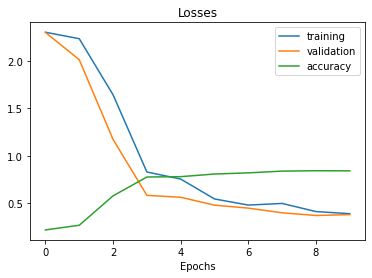

In [6]:
FFL.after_training_plots(train_loss, val_loss, acc)

In [7]:
X, y = next(iter(test_dl))
FFL.model_test(X, y, model)

prediction comparison:

 tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True, False,  True,  True, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  Tr

In [8]:
FFL.torch.save(model.state_dict(), "/content/Learning/NiN_trained.pt")
#model.load_state_dict(FFL.torch.load("/content/Learning/NiN_trained.pt"))